In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cdc_data_csv = Path("nutrition.csv")
cdc_data_complete = pd.read_csv(cdc_data_csv)

In [3]:
#Full CSV

cdc_data_complete.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [4]:
#Split Topic column to remove 'Behavior' and 'Obesity'.

cdc_data_complete[["Topic", "Report"]] = cdc_data_complete["Topic"].apply(lambda x: pd.Series(str(x).split(" - ")))

In [5]:
#Drop irrelevant columns and rename, and reorder.

cdc_data = cdc_data_complete.drop(columns=["YearEnd","LocationAbbr","Datasource","Class","Data_Value_Unit",
                                           "Data_Value_Type","Data_Value_Alt","Data_Value_Footnote_Symbol",
                                           "Data_Value_Footnote","Low_Confidence_Limit","High_Confidence_Limit ",
                                           "Total","GeoLocation","ClassID","TopicID","DataValueTypeID","Report"])

cdc_data = cdc_data.rename(columns={"YearStart":"Year","LocationDesc":"Location","Data_Value":"Response (%)",
                                    "Sample_Size":"Sample Size", "Age(years)":"Age (years)", "QuestionID":"Question ID",
                                    "LocationID":"Location ID","StratificationCategory1":"Stratification","Stratification1":"Bin",
                                    "StratificationCategoryId1":"Category ID", "StratificationID1":"Bin ID"})

cdc_data = cdc_data[["Year","Location","Topic","Question","Response (%)","Sample Size","Age (years)","Education",
                     "Gender","Income","Race/Ethnicity","Stratification","Bin","Location ID","Question ID","Category ID","Bin ID"]]

cdc_data.head()

,Year,Location,Topic,Question,Response (%),Sample Size,Age (years),Education,Gender,Income,Race/Ethnicity,Stratification,Bin,Location ID,Question ID,Category ID,Bin ID
0,2020,National,Physical Activity,Percent of adults who engage in no leisure-tim...,30.6,31255.0,NaN,NaN,NaN,NaN,Hispanic,Race/Ethnicity,Hispanic,59,Q047,RACE,RACEHIS
1,2014,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,66,Q036,EDU,EDUHSGRAD
2,2013,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,Income,"$50,000 - $74,999",59,Q036,INC,INC5075
3,2013,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN,NaN,NaN,Data not reported,NaN,Income,Data not reported,59,Q037,INC,INCNR
4,2015,National,Physical Activity,Percent of adults who achieve at least 300 min...,26.6,30904.0,NaN,NaN,NaN,"Less than $15,000",NaN,Income,"Less than $15,000",59,Q045,INC,INCLESS15


In [6]:
#Get national obesity data by year.
national_obesity = cdc_data.loc[cdc_data["Location"]=="National"][cdc_data["Question ID"]=="Q036"][cdc_data["Stratification"]=="Total"]
national_obesity = national_obesity.drop(columns=["Topic","Age (years)","Education","Gender","Income","Race/Ethnicity","Bin","Location ID","Category ID","Bin ID"]).sort_values(by=["Year"])
national_obesity

C:\Users\lucas\AppData\Local\Temp\ipykernel_26424\3236311780.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  national_obesity = cdc_data.loc[cdc_data["Location"]=="National"][cdc_data["Question ID"]=="Q036"][cdc_data["Stratification"]=="Total"]


,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID
3149,2011,National,Percent of adults aged 18 years and older who ...,27.4,470700.0,Total,Q036
10470,2012,National,Percent of adults aged 18 years and older who ...,27.7,442230.0,Total,Q036
7611,2013,National,Percent of adults aged 18 years and older who ...,28.3,457487.0,Total,Q036
1069,2014,National,Percent of adults aged 18 years and older who ...,28.9,425875.0,Total,Q036
2487,2015,National,Percent of adults aged 18 years and older who ...,28.9,398316.0,Total,Q036
78790,2016,National,Percent of adults aged 18 years and older who ...,29.6,438479.0,Total,Q036
14524,2017,National,Percent of adults aged 18 years and older who ...,30.1,408448.0,Total,Q036
4405,2018,National,Percent of adults aged 18 years and older who ...,30.9,396022.0,Total,Q036
49654,2019,National,Percent of adults aged 18 years and older who ...,31.4,374073.0,Total,Q036
9355,2020,National,Percent of adults aged 18 years and older who ...,31.9,353841.0,Total,Q036


In [7]:
#Get national activity data by year.
national_activity = cdc_data.loc[cdc_data["Location"]=="National"][cdc_data["Question ID"]=="Q043"][cdc_data["Stratification"]=="Total"]

national_activity = national_activity.drop(columns=["Topic","Age (years)","Education","Gender","Income","Race/Ethnicity","Bin","Location ID","Category ID","Bin ID"]).sort_values(by=["Year"])
national_activity

C:\Users\lucas\AppData\Local\Temp\ipykernel_26424\332463203.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  national_activity = cdc_data.loc[cdc_data["Location"]=="National"][cdc_data["Question ID"]=="Q043"][cdc_data["Stratification"]=="Total"]


,Year,Location,Question,Response (%),Sample Size,Stratification,Question ID
12763,2011,National,Percent of adults who achieve at least 150 min...,51.6,458088.0,Total,Q043
12983,2013,National,Percent of adults who achieve at least 150 min...,50.2,433081.0,Total,Q043
12414,2015,National,Percent of adults who achieve at least 150 min...,50.9,381483.0,Total,Q043
28096,2017,National,Percent of adults who achieve at least 150 min...,50.3,394726.0,Total,Q043
45070,2019,National,Percent of adults who achieve at least 150 min...,51.5,359753.0,Total,Q043


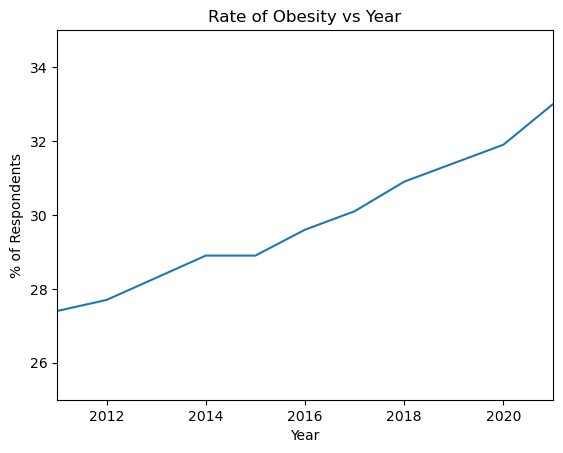

In [9]:
#Obesity over time
x_axis = national_obesity["Year"]
y_axis = national_obesity["Response (%)"]
plt.title("Rate of Obesity vs Year")
plt.xlabel("Year")
plt.xlim(2011,2021)
plt.ylabel("% of Respondents")
plt.ylim(25,35)

plt.plot(x_axis, y_axis)

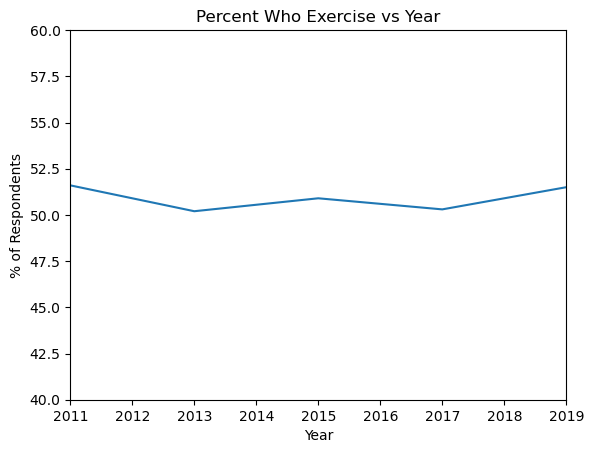

In [10]:
#All activity over time
x_axis = national_activity["Year"]
y_axis = national_activity["Response (%)"]
plt.title("Percent Who Exercise vs Year")
plt.xlabel("Year")
plt.xlim(2011,2019)
plt.ylabel("% of Respondents")
plt.ylim(40,60)
                           
plt.plot(x_axis, y_axis)